<a href="https://colab.research.google.com/github/Jasmine-kaur8/Insurance_claim_fraud_detection/blob/main/Insurance_Claims_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
from google.colab import files
uploaded = files.upload()

Saving Automobile_insurance_fraud(project).csv to Automobile_insurance_fraud(project) (4).csv


Importing the data

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


Importing the libraries

In [132]:
data = pd.read_csv('Automobile_insurance_fraud(project).csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


Reaading the data, the target variable is fraud_reported which is a categorical variable thus it is a classification problem

In [133]:
data.shape

(1000, 40)

The dataset has 1000 rows and 40 columns

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

There are some object datatype and some numerical datatype variables. The variable _c39 has no value, it is better to drop this variable.

In [135]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


There are outliers in the data

In [136]:
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

The only variable with null value is _c39

In [137]:
data.drop(columns = ['_c39'], axis = 1, inplace = True)

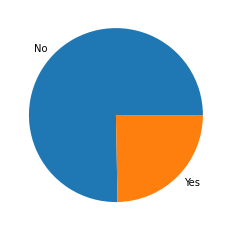

In [138]:
y = data['fraud_reported'].value_counts()
labels = ["No","Yes"]

plt.pie(y, labels = labels)
plt.show()

There is class imbalance

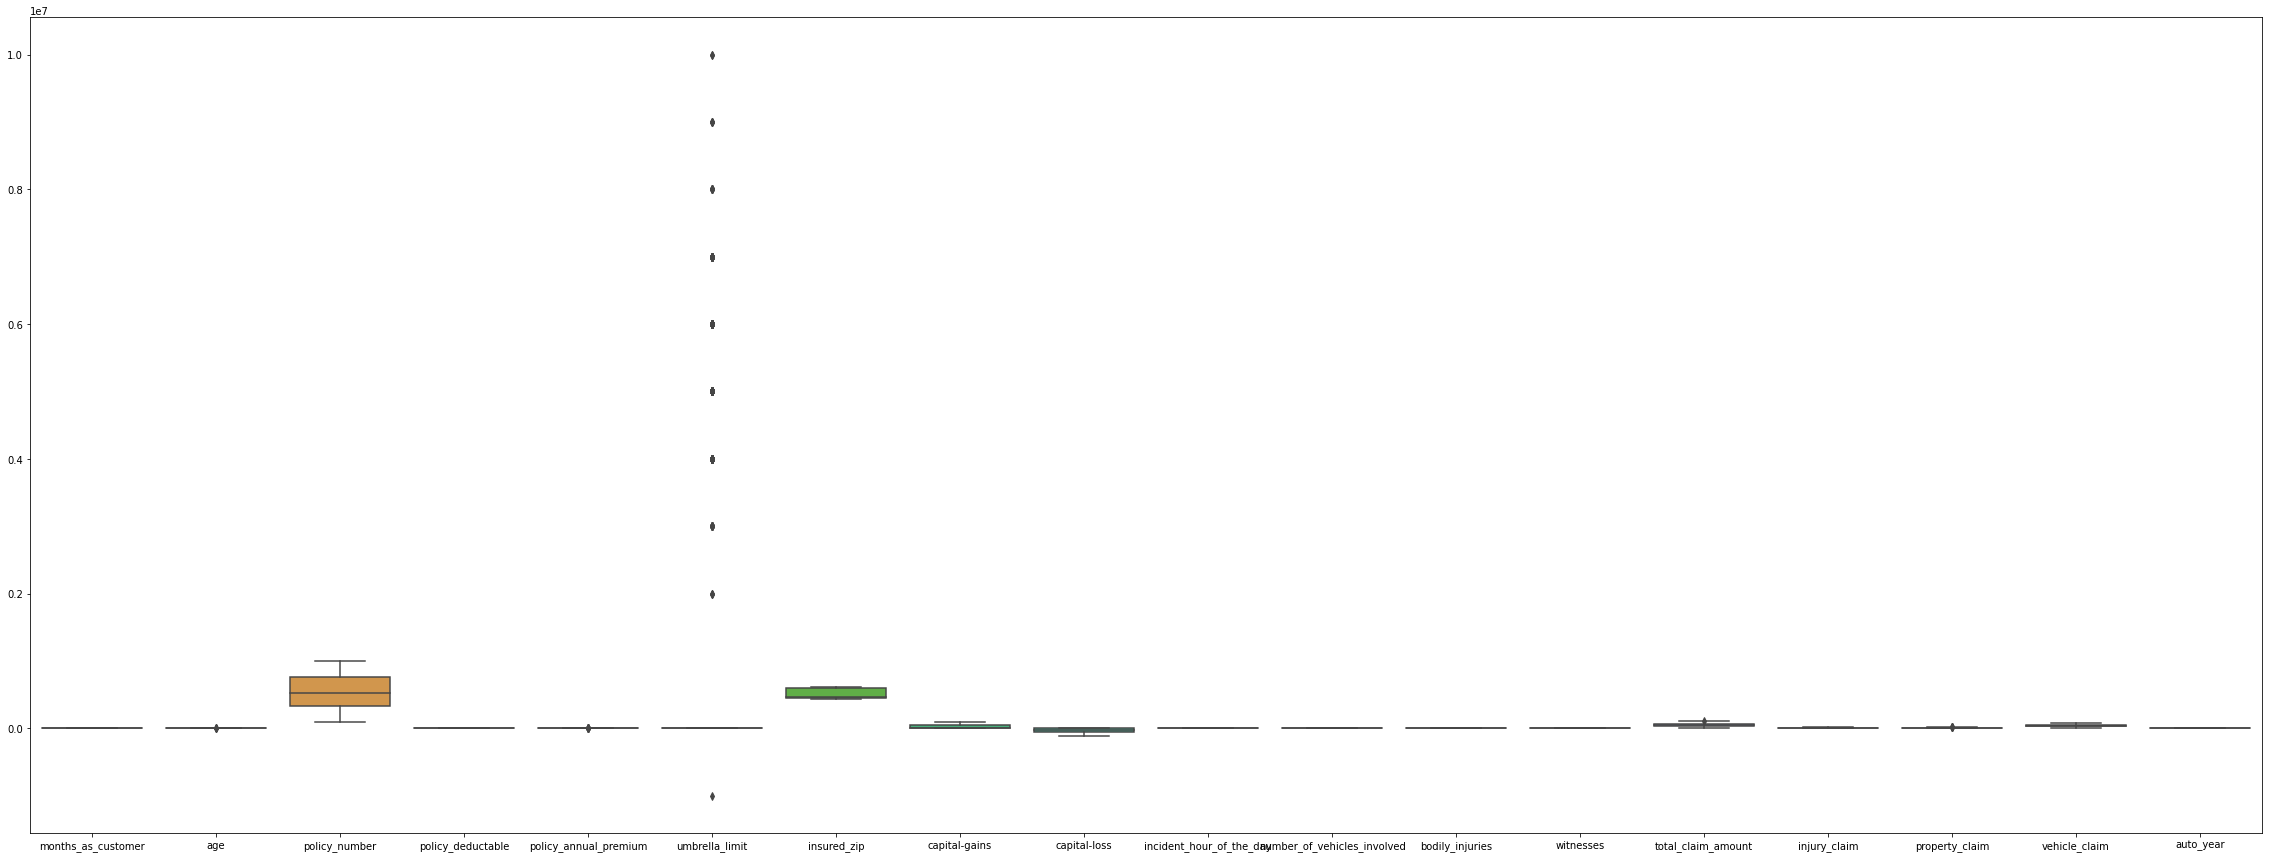

In [139]:
fig, ax = plt.subplots(1, 1, figsize=(40, 15))
sns.boxplot(data = data, ax=ax)
plt.show()

Umbrella_limit has highest number of outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c3fe918d0>,
      dtype=object)

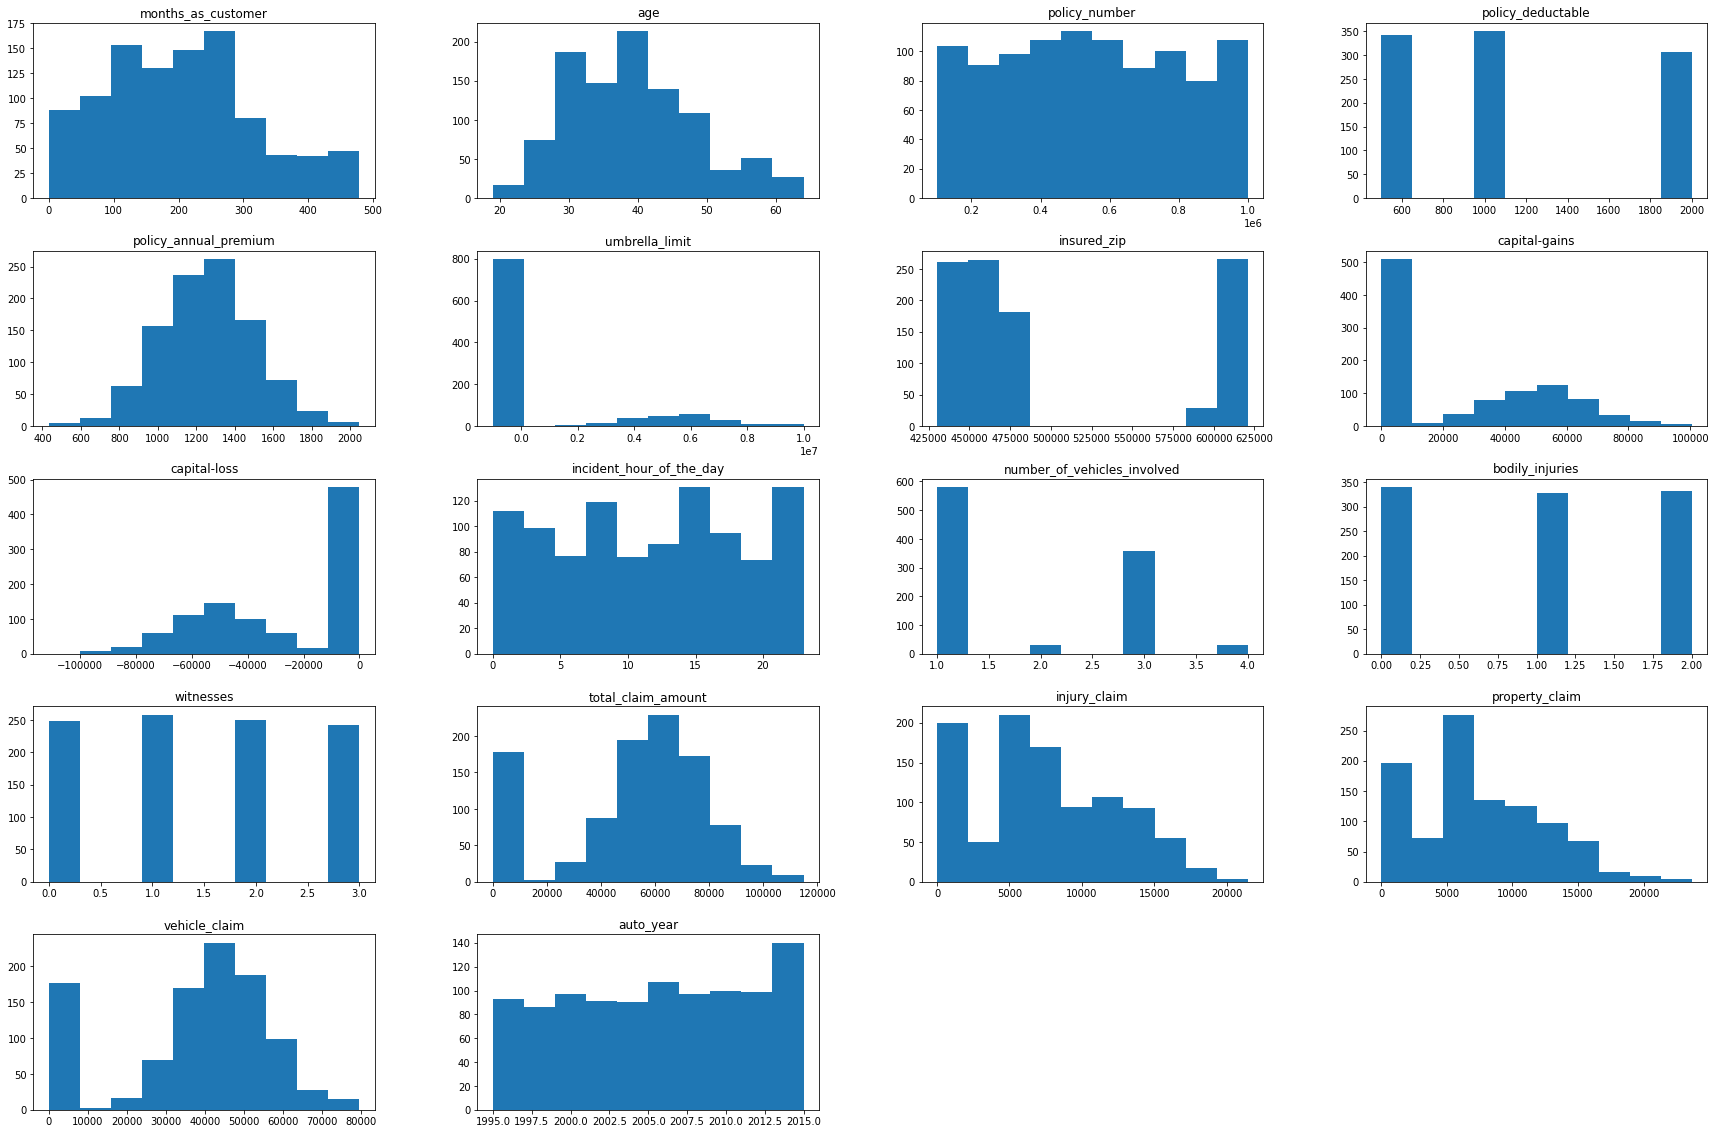

In [140]:
data.hist(figsize = (30,20), grid = False)


The feature: umbrella_limit and insured_zip have skewed data.

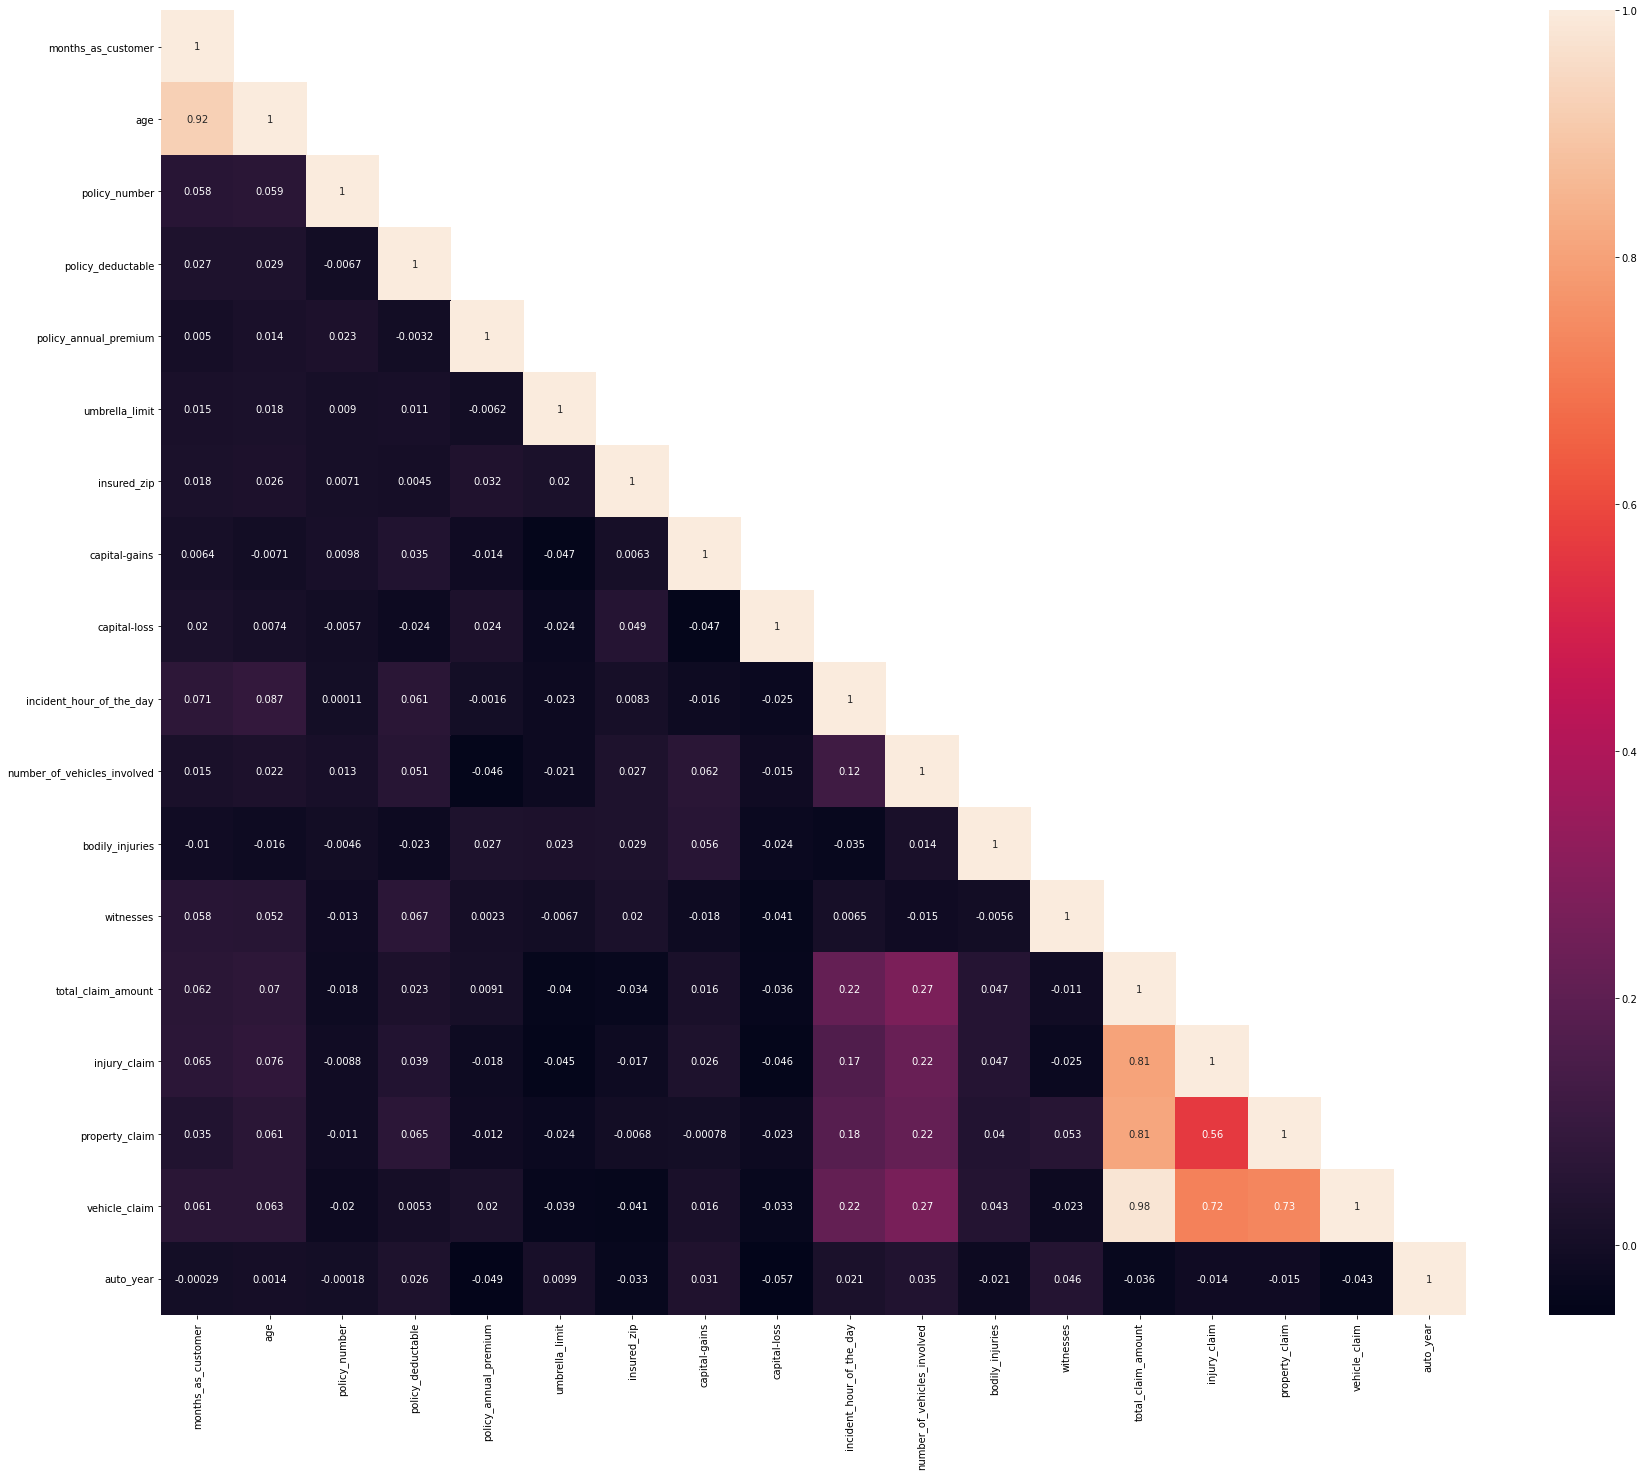

In [141]:
#Correlation Matrix

corr_mat = data.corr()
m = np.array(corr_mat)
m[np.tril_indices_from(m)] = False

fig = plt.gcf()
fig.set_size_inches(30,24)
sns.heatmap(data = corr_mat, mask = m, square = True, annot = True, cbar = True)

*   Toal_claim_amount is highly correlated with:
1.   injury_claim
2.   property_claim
3.   vehicle_claim
*    Property_claim is highly correlated with:
1.   vehicle_claim
*    Injury_claim
1.   property_claim
2.   vehicle_claim  
*   age is highly correlated with months_as_customer

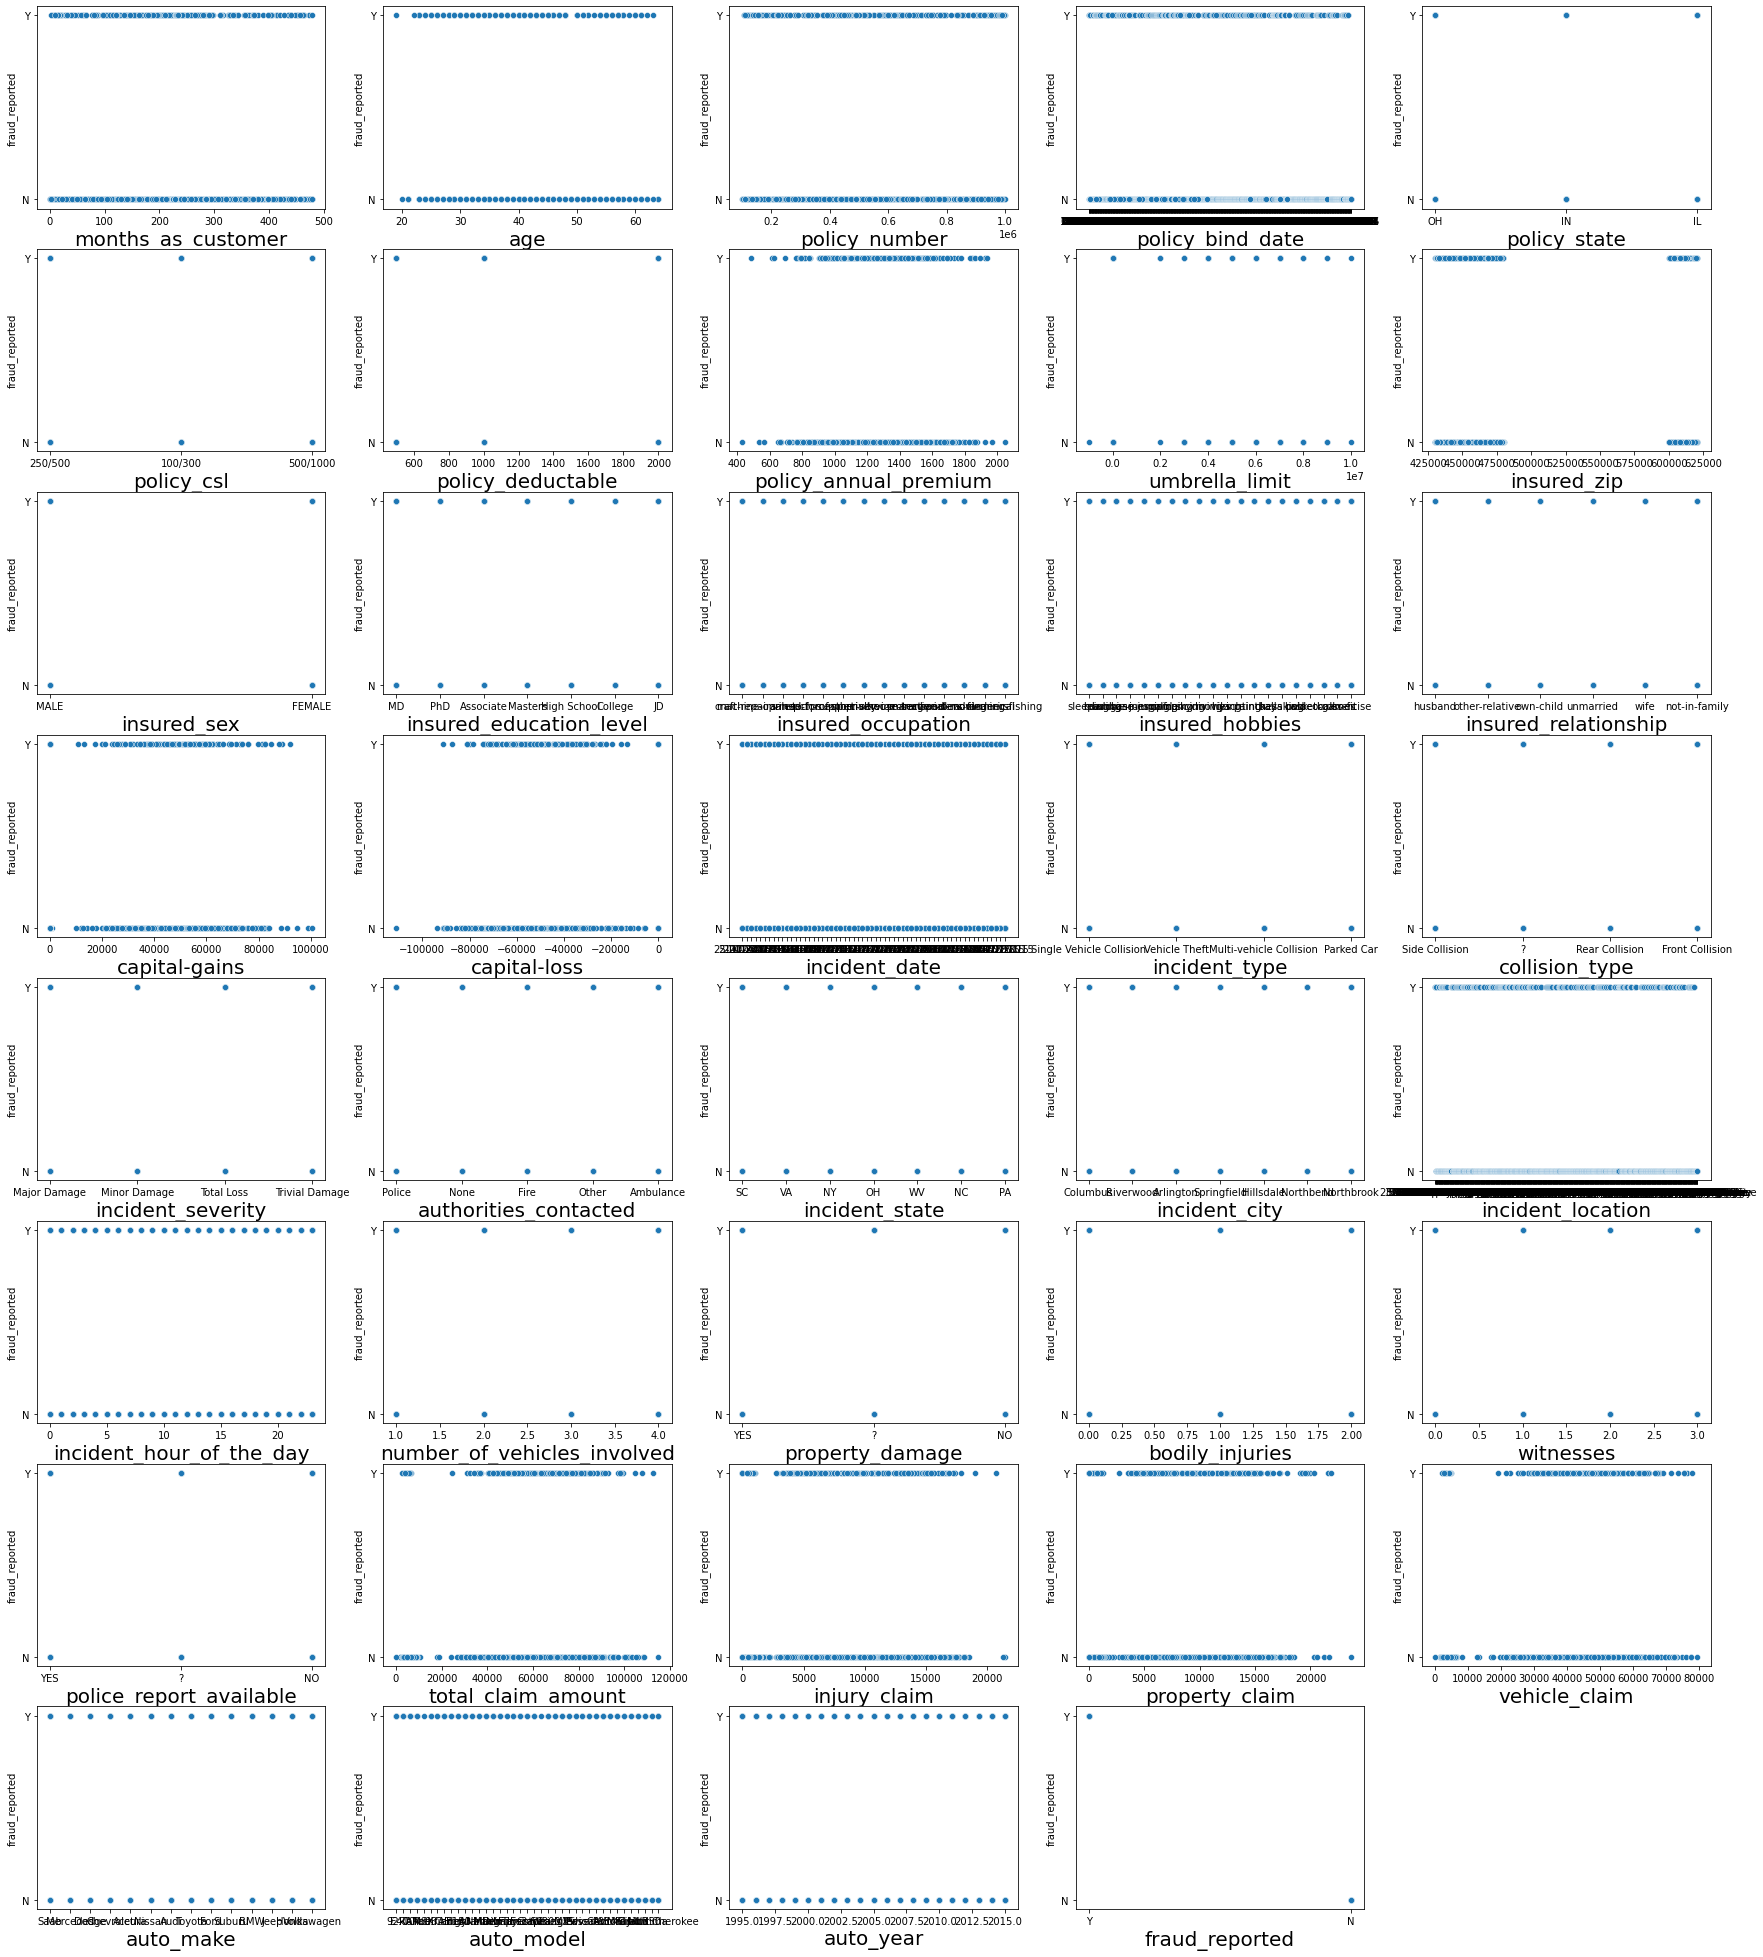

In [142]:
plt.figure(figsize = (30,35))
graph = 1

for column in data:
  if graph<=40:
    ax = plt.subplot(8,5,graph)
    sns.scatterplot(x = data[column], y = 'fraud_reported', data = data)
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

Following features are more likely to fraud:
1.   if policy bind date is far
2.   policy annual premium is high
3.   high collusion type

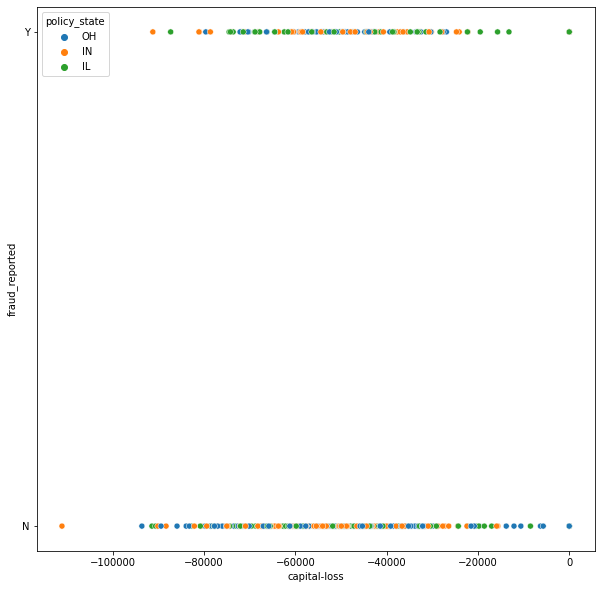

In [143]:
fig,axes=plt.subplots(1,1,figsize=(10,10))
sns.scatterplot(x='capital-loss',y='fraud_reported',hue='policy_state',data=data)

Those with low capital loss are more likely to fraud.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'count plot for witness and fraud reported')

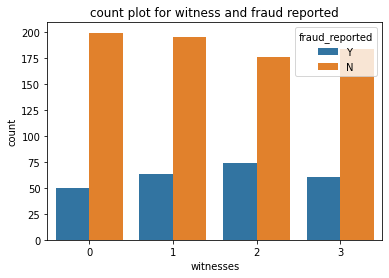

In [144]:
sns.countplot(data['witnesses'], hue = data['fraud_reported'])
plt.title('count plot for witness and fraud reported')

The number of witnesses are not impacting the fraud rate very significantly

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


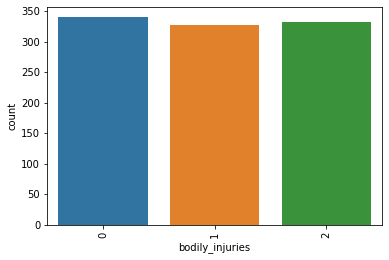

In [145]:
print(data['bodily_injuries'].value_counts())
sns.countplot(data['bodily_injuries'])
plt.xticks(rotation = 90);

The distribution is similar with respeet to the bodies injured.

In [146]:
#Treating the outliers

# findingout the quantile of data with continuous columns
col = data.drop(columns = ['policy_bind_date','policy_state','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_date','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','property_damage','police_report_available','auto_make','auto_model','fraud_reported'])
Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1
# REMOVING OUTLIERS USING IQR METHOD
data_new = col[~((col < (Q1 -  1.5*IQR)) |(col > (Q3 +  1.5*IQR))).any(axis=1)]
print("shape before and after")
print("shape before".ljust(20),":", col.shape)
print("shape after".ljust(20),":", data_new.shape)
print("Percentage Loss".ljust(20),":", (col.shape[0]-data_new.shape[0])/col.shape[0])

shape before and after
shape before         : (1000, 20)
shape after          : (782, 20)
Percentage Loss      : 0.218


21% of the data is lost, so can't apply IQR

In [148]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Applied label encoer

In [149]:
data['policy_bind_date']=le.fit_transform(data['policy_bind_date'])
data['policy_state']=le.fit_transform(data['policy_state'])
data['insured_sex']=le.fit_transform(data['insured_sex'])
data['insured_education_level']=le.fit_transform(data['insured_education_level'])
data['insured_occupation']=le.fit_transform(data['insured_occupation'])
data['insured_hobbies']=le.fit_transform(data['insured_hobbies'])
data['insured_relationship']=le.fit_transform(data['insured_relationship'])
data['incident_date']=le.fit_transform(data['incident_date'])
data['collision_type']=le.fit_transform(data['collision_type'])
data['incident_severity']=le.fit_transform(data['incident_severity'])
data['authorities_contacted']=le.fit_transform(data['authorities_contacted'])
data['incident_state']=le.fit_transform(data['incident_state'])
data['incident_city']=le.fit_transform(data['incident_city'])
data['property_damage']=le.fit_transform(data['property_damage'])
data['police_report_available']=le.fit_transform(data['police_report_available'])
data['auto_make']=le.fit_transform(data['auto_make'])
data['auto_model']=le.fit_transform(data['auto_model'])
data['fraud_reported']=le.fit_transform(data['fraud_reported'])
data['incident_location']=le.fit_transform(data['incident_location'])
data['incident_type']=le.fit_transform(data['incident_type'])
data['policy_csl']=le.fit_transform(data['policy_csl'])

Transformed the categorical data into numerical data

In [150]:
#Applying z score
from scipy.stats import zscore
z = np.abs(zscore(data))

data1 = data[(z<3).all(axis = 1)]

Applied z score

In [151]:
print("shape before and after")
print("shape before".ljust(20),":", data.shape)
print("shape after".ljust(20),":", data1.shape)
print("Percentage Loss".ljust(20),":", (data.shape[0]-data1.shape[0])/data.shape[0])

shape before and after
shape before         : (1000, 39)
shape after          : (980, 39)
Percentage Loss      : 0.02


Lost only 2% data, so we can apply the z score

In [152]:
#applying standard scaler:

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler = StandardScaler()
x_scaled = scaler.fit_transform(data1)

Applied standard scaler

In [153]:
x_scaled.shape[1]
vif = pd.DataFrame()

vif['Features'] = data1.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,vif
0,months_as_customer,6.900056
1,age,6.924151
2,policy_number,1.032789
3,policy_bind_date,1.032846
4,policy_state,1.037038
5,policy_csl,1.033830
6,policy_deductable,1.041684
7,policy_annual_premium,1.041532
8,umbrella_limit,1.039838
9,insured_zip,1.039000


VIF is inf for some of the variables, so it is important to drop one of them

In [154]:

X = data.drop(columns = ['fraud_reported'])
X_scaled = scaler.fit_transform(X)

Dropped the target variable

In [155]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_scaled)

array([[-1.11586149e+00,  1.14884878e+00,  1.37391309e+00, ...,
        -1.69802981e-01, -2.05045792e-02, -1.55176677e-15],
       [ 3.99151480e+00,  7.34571251e-01,  3.37498906e-01, ...,
         5.49249306e-01,  7.53975917e-02, -1.09636145e-16],
       [ 4.23810725e-01, -9.93965907e-01, -1.54880250e+00, ...,
         6.36263056e-02, -3.01664118e-01,  2.41795557e-15],
       ...,
       [-1.18779889e+00, -7.99989160e-01, -1.02610755e+00, ...,
         3.70320722e-02,  1.72750291e-01,  3.86584904e-16],
       [ 6.94463467e-01,  3.87601129e+00,  6.10715921e-01, ...,
        -1.06951332e-01,  2.21660856e-01, -4.24040402e-16],
       [ 3.57577957e+00,  3.11810501e+00, -1.67159630e+00, ...,
        -6.03289381e-01,  9.81096400e-02,  2.29078784e-15]])

Applied pca

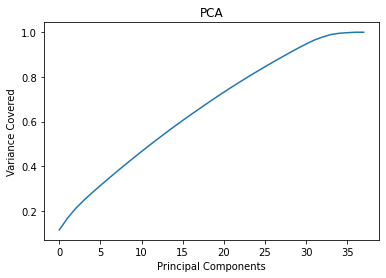

In [156]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

Very high number of features are required to get 95% of the data, does not a good option to apply pca.

In [157]:
data1.drop(columns = ['total_claim_amount'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


dropped total_claim_amount as it was leading to the problem of multicollinearity

In [158]:
#applying standard scaler again:


scaler = StandardScaler()
x_scaled = scaler.fit_transform(data1)

applied standard scaler again

In [159]:
x_scaled.shape[1]
vif = pd.DataFrame()

vif['Features'] = data1.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif

,Features,vif
0,months_as_customer,6.900056
1,age,6.924151
2,policy_number,1.032789
3,policy_bind_date,1.032846
4,policy_state,1.037038
5,policy_csl,1.033830
6,policy_deductable,1.041684
7,policy_annual_premium,1.041532
8,umbrella_limit,1.039838
9,insured_zip,1.039000


Now, VIF is less than 10 for all the features, so there is no problem of multicollinearity

In [161]:
Y = data1['fraud_reported']
X = data1.drop(columns = ['fraud_reported'])

Spliting the data

In [162]:
#Handling class imbalance problem by oversampling the minority classes.

from imblearn.over_sampling import SMOTE
SM = SMOTE()
X_over, Y_over = SM.fit_resample(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Applied oversampling

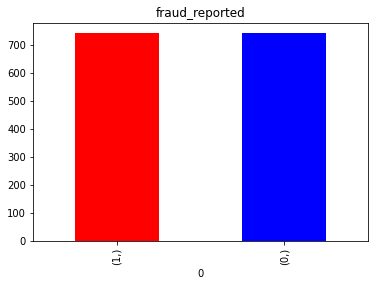

In [164]:
pd.DataFrame(Y_over).value_counts().plot(kind='bar', title='fraud_reported', color=['r','b'])

dealt with the problem of class imbalance

In [165]:
y = pd.Series(Y_over)
y

0       1
1       1
2       0
3       1
4       0
       ..
1475    1
1476    1
1477    1
1478    1
1479    1
Length: 1480, dtype: int64

Converted the data into series

In [166]:
x = pd.DataFrame(X_over)
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,328.000000,48.000000,521585.000000,532.000000,2.000000,1.000000,1000.000000,1406.910000,0.0,466132.000000,1.000000,4.000000,2.000000,17.000000,0.000000,53300.000000,0.000000,49.000000,2.000000,3.000000,0.000000,4.000000,4.000000,1.000000,996.000000,5.000000,1.000000,2.000000,1.000000,2.000000,2.000000,6510.000000,13020.000000,52080.000000,10.000000,1.000000,2004.000000
1,228.000000,42.000000,342868.000000,821.000000,1.000000,1.000000,2000.000000,1197.220000,5000000.0,468176.000000,1.000000,4.000000,6.000000,15.000000,2.000000,0.000000,0.000000,41.000000,3.000000,0.000000,1.000000,4.000000,5.000000,5.000000,628.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,780.000000,780.000000,3510.000000,8.000000,12.000000,2007.000000
2,134.000000,29.000000,687698.000000,186.000000,2.000000,0.000000,2000.000000,1413.140000,5000000.0,430632.000000,0.000000,6.000000,11.000000,2.000000,3.000000,35100.000000,0.000000,44.000000,0.000000,2.000000,1.000000,4.000000,1.000000,1.000000,685.000000,7.000000,3.000000,1.000000,2.000000,3.000000,1.000000,7700.000000,3850.000000,23100.000000,4.000000,30.000000,2007.000000
3,256.000000,41.000000,227811.000000,766.000000,0.000000,1.000000,2000.000000,1415.740000,6000000.0,608117.000000,0.000000,6.000000,1.000000,2.000000,4.000000,48900.000000,-62400.000000,19.000000,2.000000,1.000000,0.000000,4.000000,2.000000,0.000000,669.000000,5.000000,1.000000,0.000000,1.000000,2.000000,1.000000,6340.000000,6340.000000,50720.000000,3.000000,34.000000,2014.000000
4,228.000000,44.000000,367455.000000,181.000000,0.000000,2.000000,1000.000000,1583.910000,6000000.0,610706.000000,1.000000,0.000000,11.000000,2.000000,4.000000,66000.000000,-46000.000000,34.000000,3.000000,0.000000,1.000000,2.000000,1.000000,0.000000,220.000000,20.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1300.000000,650.000000,4550.000000,0.000000,31.000000,2009.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,325.383614,48.827605,449654.693007,467.101239,0.000000,1.000000,683.447895,1275.435453,0.0,457029.502769,1.000000,3.266208,5.568271,6.899313,1.733792,0.000000,-54935.017805,21.697938,1.266208,1.366896,0.366896,4.000000,1.000000,0.733792,252.348693,9.899313,1.733792,0.733792,0.366896,0.000000,0.000000,8729.842153,6194.592243,53216.080276,6.532417,26.201375,1996.266208
1476,206.349981,38.668118,654256.846077,872.658496,1.333257,0.666743,2000.000000,1285.417792,6000000.0,572529.065562,0.000000,3.666743,6.000229,7.332341,4.333257,40737.999254,-38398.235961,24.666285,0.000000,2.000000,0.000000,2.333486,4.333257,0.666514,549.028179,19.333715,2.666743,0.666514,1.000000,0.000000,0.333257,11386.600993,9393.724324,37860.226805,4.333257,24.667889,2012.333028
1477,257.064283,43.917236,918860.723534,580.211158,1.000000,0.670608,994.088274,1289.006249,0.0,470445.165532,0.000000,1.317569,10.988177,7.976353,3.341216,47853.888536,0.000000,38.893589,0.000000,2.329392,1.341216,1.658784,4.658784,0.658784,746.452792,13.341216,3.329392,1.329392,0.670608,1.341216,1.670608,7428.497962,7428.497962,45567.160651,6.035470,25.011823,1998.329392
1478,295.063646,46.898773,264093.569734,552.710108,0.000000,0.506327,1493.673284,1104.098362,0.0,451169.079586,1.000000,2.000000,4.949386,11.481020,2.506327,80345.533405,-59592.445836,19.481020,0.000000,1.493673,0.000000,0.506327,4.000000,4.025307,271.341264,20.506327,3.000000,0.493673,0.506327,0.000000,1.493673,16249.627976,10365.042425,53229.340802,8.974693,25.632861,1999.493673


Converted the data into dataframe

In [169]:
x1.columns = ['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year']
x1.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328.0,48.0,521585.0,532.0,2.0,1.0,1000.0,1406.91,0.0,466132.0,1.0,4.0,2.0,17.0,0.0,53300.0,0.0,49.0,2.0,3.0,0.0,4.0,4.0,1.0,996.0,5.0,1.0,2.0,1.0,2.0,2.0,6510.0,13020.0,52080.0,10.0,1.0,2004.0
1,228.0,42.0,342868.0,821.0,1.0,1.0,2000.0,1197.22,5000000.0,468176.0,1.0,4.0,6.0,15.0,2.0,0.0,0.0,41.0,3.0,0.0,1.0,4.0,5.0,5.0,628.0,8.0,1.0,0.0,0.0,0.0,0.0,780.0,780.0,3510.0,8.0,12.0,2007.0
2,134.0,29.0,687698.0,186.0,2.0,0.0,2000.0,1413.14,5000000.0,430632.0,0.0,6.0,11.0,2.0,3.0,35100.0,0.0,44.0,0.0,2.0,1.0,4.0,1.0,1.0,685.0,7.0,3.0,1.0,2.0,3.0,1.0,7700.0,3850.0,23100.0,4.0,30.0,2007.0
3,256.0,41.0,227811.0,766.0,0.0,1.0,2000.0,1415.74,6000000.0,608117.0,0.0,6.0,1.0,2.0,4.0,48900.0,-62400.0,19.0,2.0,1.0,0.0,4.0,2.0,0.0,669.0,5.0,1.0,0.0,1.0,2.0,1.0,6340.0,6340.0,50720.0,3.0,34.0,2014.0
4,228.0,44.0,367455.0,181.0,0.0,2.0,1000.0,1583.91,6000000.0,610706.0,1.0,0.0,11.0,2.0,4.0,66000.0,-46000.0,34.0,3.0,0.0,1.0,2.0,1.0,0.0,220.0,20.0,1.0,1.0,0.0,1.0,1.0,1300.0,650.0,4550.0,0.0,31.0,2009.0


Changed the name of the columns

In [172]:
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
dtc = DecisionTreeClassifier()
gb = GradientBoostingClassifier()

Initialized the classifiers

In [174]:
#Model Building

X_train, X_test, y_train, y_test = train_test_split(
    x1, y, test_size=0.25, random_state=42)
models = [KNeighborsClassifier(), RandomForestClassifier(),
          DecisionTreeClassifier(), GradientBoostingClassifier()]
model_names = ['KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree',
               'GradientBoostingClassifier']

acc = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc.append(accuracy_score(pred, y_test))

models = {'Modelling Algorithm': model_names, 'Accuracy': acc}
models_df = pd.DataFrame(models)
models_df

,Modelling Algorithm,Accuracy
0,KNearestNeighbors,0.745946
1,RandomForestClassifier,0.886486
2,DecisionTree,0.824324
3,GradientBoostingClassifier,0.894595


Trained the model and received the accuracy score

In [175]:
#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.745945945945946
Precision: 0.7397260273972602
Recall: 0.8140703517587939
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71       171
           1       0.74      0.81      0.78       199

    accuracy                           0.75       370
   macro avg       0.75      0.74      0.74       370
weighted avg       0.75      0.75      0.74       370



classification report of knn

In [176]:
#Train the model using the training sets
rf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = rf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.8810810810810811
Precision: 0.91005291005291
Recall: 0.864321608040201
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88       171
           1       0.91      0.86      0.89       199

    accuracy                           0.88       370
   macro avg       0.88      0.88      0.88       370
weighted avg       0.88      0.88      0.88       370



classification report of rf

In [177]:
#Train the model using the training sets
dtc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = dtc.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.8297297297297297
Precision: 0.8366336633663366
Recall: 0.8492462311557789
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       171
           1       0.84      0.85      0.84       199

    accuracy                           0.83       370
   macro avg       0.83      0.83      0.83       370
weighted avg       0.83      0.83      0.83       370



classification report of dtc

In [178]:
#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.8945945945945946
Precision: 0.9040404040404041
Recall: 0.8994974874371859
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       171
           1       0.90      0.90      0.90       199

    accuracy                           0.89       370
   macro avg       0.89      0.89      0.89       370
weighted avg       0.89      0.89      0.89       370



classification report of gb

In [179]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

Imported the libraries

In [180]:
X1_train, X1_test, y1_train, y1_test = train_test_split(
    x1, y, test_size=0.25, random_state=50)

knn = KNeighborsClassifier()
knn.fit(X1_train,y1_train)

y1_pred = knn.predict(X1_test)
conf_mat1 = confusion_matrix(y1_test,y1_pred)
conf_mat1

array([[ 87,  86],
       [ 33, 164]])

confusion matrix of knn

In [181]:
true_positive1 = conf_mat1[0][0]
false_positive1 = conf_mat1[0][1]
false_negative1= conf_mat1[1][0]
false_negative1 = conf_mat1[1][1]

auc1 = roc_auc_score(y1_test,y1_pred)
auc1

0.6676887415275374

The auc score of knn is 66%

In [182]:

fpr1, tpr1, threshholds1 = roc_curve(y1_test, y1_pred)

print(fpr1)
print(tpr1)
print(threshholds1)

[0.         0.49710983 1.        ]
[0.         0.83248731 1.        ]
[2 1 0]


fpr, tpr and threshhold of knn

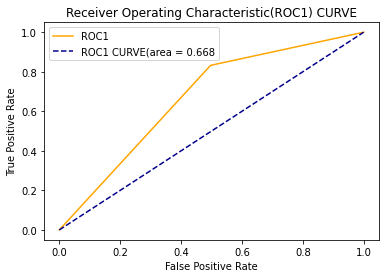

In [183]:
plt.plot(fpr1, tpr1, color = 'orange', label = 'ROC1')

plt.plot([0,1],[0,1],color = 'darkblue', linestyle = '--', label = 'ROC1 CURVE(area = %0.3f'%auc1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic(ROC1) CURVE')

plt.legend()

plt.show()

roc curve of knn

In [184]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    x1, y, test_size=0.25, random_state=50)

rf = RandomForestClassifier()
rf.fit(X2_train,y2_train)

y2_pred = rf.predict(X2_test)
conf_mat2 = confusion_matrix(y2_test,y2_pred)
conf_mat2

array([[153,  20],
       [ 35, 162]])

confusion matrix of rf

In [185]:
true_positive2 = conf_mat2[0][0]
false_positive2 = conf_mat2[0][1]
false_negative2 = conf_mat2[1][0]
false_negative2 = conf_mat2[1][1]

auc2 = roc_auc_score(y2_test,y2_pred)
auc2

0.8533640444822629

auc score of rf is 85%

In [186]:
fpr2, tpr2, threshholds2 = roc_curve(y2_test, y2_pred)

print(fpr2)
print(tpr2)
print(threshholds2)

[0.         0.11560694 1.        ]
[0.         0.82233503 1.        ]
[2 1 0]


fpr, tpr and threshhold of rf

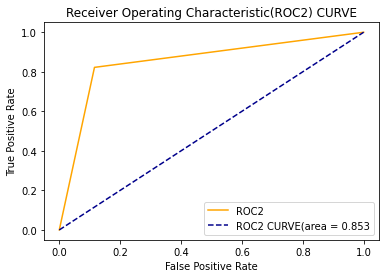

In [187]:
plt.plot(fpr2, tpr2, color = 'orange', label = 'ROC2')

plt.plot([0,1],[0,1],color = 'darkblue', linestyle = '--', label = 'ROC2 CURVE(area = %0.3f'%auc2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic(ROC2) CURVE')

plt.legend()

plt.show()

roc curve of rf

In [188]:
X3_train, X3_test, y3_train, y3_test = train_test_split(
    x1, y, test_size=0.25, random_state=50)

dtc = DecisionTreeClassifier()
dtc.fit(X3_train,y3_train)

y3_pred = dtc.predict(X3_test)
conf_mat3 = confusion_matrix(y3_test,y3_pred)
conf_mat3

array([[142,  31],
       [ 30, 167]])

confusion matrix of dtc

In [189]:
true_positive3 = conf_mat3[0][0]
false_positive3 = conf_mat3[0][1]
false_negative3 = conf_mat3[1][0]
false_negative3 = conf_mat3[1][1]

auc3 = roc_auc_score(y3_test,y3_pred)
auc3

0.8342624922977613

auc score of dtc is 83%

In [190]:
fpr3, tpr3, threshholds3 = roc_curve(y3_test, y3_pred)

print(fpr3)
print(tpr3)
print(threshholds3)

[0.         0.17919075 1.        ]
[0.         0.84771574 1.        ]
[2 1 0]


fpr, tpr, threshhold of dtc

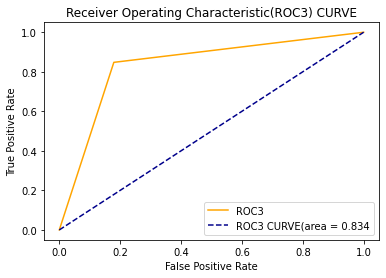

In [191]:
plt.plot(fpr3, tpr3, color = 'orange', label = 'ROC3')

plt.plot([0,1],[0,1],color = 'darkblue', linestyle = '--', label = 'ROC3 CURVE(area = %0.3f'%auc3)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic(ROC3) CURVE')

plt.legend()

plt.show()

roc curve of dtc

In [192]:
X4_train, X4_test, y4_train, y4_test = train_test_split(
    x1, y, test_size=0.25, random_state=50)

gb = GradientBoostingClassifier()
gb.fit(X4_train,y4_train)

y4_pred = gb.predict(X4_test)
conf_mat4 = confusion_matrix(y4_test,y4_pred)
conf_mat4

array([[148,  25],
       [ 28, 169]])

confusion matrix of gb

In [193]:
true_positive4 = conf_mat4[0][0]
false_positive4 = conf_mat4[0][1]
false_negative4 = conf_mat4[1][0]
false_negative4 = conf_mat4[1][1]

auc4 = roc_auc_score(y4_test,y4_pred)
auc4

0.8566796748921687

auc score of gb

In [194]:
fpr4, tpr4, threshholds4 = roc_curve(y4_test, y4_pred)

print(fpr4)
print(tpr4)
print(threshholds4)


[0.         0.14450867 1.        ]
[0.         0.85786802 1.        ]
[2 1 0]


fpr, tpr, threshhold of gb

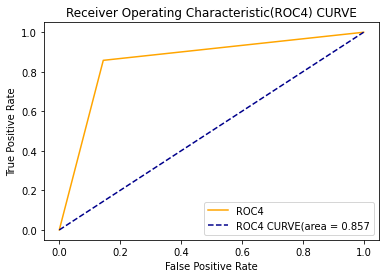

In [195]:
plt.plot(fpr4, tpr4, color = 'orange', label = 'ROC4')

plt.plot([0,1],[0,1],color = 'darkblue', linestyle = '--', label = 'ROC4 CURVE(area = %0.3f'%auc4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic(ROC4) CURVE')

plt.legend()

plt.show()

roc curve of gb

In [197]:
#Now, let's apply cross validation 

from sklearn.model_selection import KFold, cross_val_score,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    x1, y, test_size=0.25, random_state=42)
models = [KNeighborsClassifier(), RandomForestClassifier(),
          DecisionTreeClassifier(), GradientBoostingClassifier()]
model_names = ['KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree',
               'GradientBoostingClassifier']


k_f = KFold(n_splits = 4, shuffle = True)
k_f

CV_S = []

for model in range(len(models)):
    clf = models[model]
    c = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    CV_S.append(cross_val_score(c, x1, y, cv = 5).mean())
    

CV = {'Modelling Algorithm': model_names, 'CV SCORE': CV_S}
CV_df = pd.DataFrame(CV)
CV_df

,Modelling Algorithm,CV SCORE
0,KNearestNeighbors,0.691216
1,RandomForestClassifier,0.860811
2,DecisionTree,0.831757
3,GradientBoostingClassifier,0.862162


applied cross validation 

In [198]:
#Comparing CV Score and the Accuracy score:

Comparison = pd.DataFrame({})
Comparison['Modelling Algorithm'] =  model_names
Comparison['ACCURACY'] = acc
Comparison['CV SCORE'] = CV_S
Comparison['Difference'] = [acc[0] - CV_S[0], acc[1] - CV_S[1], acc[2] - CV_S[2], acc[3] - CV_S[3]]
Comparison

,Modelling Algorithm,ACCURACY,CV SCORE,Difference
0,KNearestNeighbors,0.745946,0.691216,0.054730
1,RandomForestClassifier,0.886486,0.860811,0.025676
2,DecisionTree,0.824324,0.831757,-0.007432
3,GradientBoostingClassifier,0.894595,0.862162,0.032432


The difference between the two is mimimum for the random forest classifier

In [199]:
#HYPERPARAMETER TUNING:

grid_param = {
    'n_estimators' : range(80,160,20),
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(1,5),
    'min_samples_split' : range(0,10,2)
}

Applied hyperparameter tuning

In [200]:
grid = GridSearchCV(rf, param_grid = grid_param)

applied grid search CV

In [201]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

Trained the model

In [202]:
best_parameters = grid.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 6, 'n_estimators': 140}


received the best parameters

In [203]:
#FINAL MODEL
#Substituting the best parameters in the KNeighborsClassifier:

rf = RandomForestClassifier(criterion = 'gini', max_depth = 4, min_samples_split = 6, n_estimators = 140)

rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.8540540540540541

After substituting the best parameters, the score is 85%

In [204]:
#SAVING THE MODEL:

import joblib
joblib.dump(rf, 'insurance_claims_final_model.pkl')

['insurance_claims_final_model.pkl']

Saved the model